# Accumulation/Distribution Line

https://www.investopedia.com/terms/a/accumulationdistribution.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-09-04,223.062759,228.360001,229.179993,226.630005,228.410004,27390100
2018-09-05,221.607346,226.869995,229.669998,225.100006,228.990005,33333000
2018-09-06,217.924789,223.100006,227.350006,221.300003,226.229996,34290000
2018-09-07,216.166550,221.300003,225.369995,220.710007,221.850006,37619800
2018-09-10,213.265411,218.330002,221.850006,216.470001,220.949997,39516500


In [16]:
def accumulation_distribution_line(df, n):
    adl = 0
    money_flow_multiplier = ((df['Adj Close'] - df['Low'].shift(n)) - (df['High'].shift(n) - df['Adj Close'])) / (df['High'].shift(n) - df['Low'].shift(n))
    money_flow_volume = money_flow_multiplier * df['Volume'].shift(n)
    adl = adl + money_flow_volume
    return adl

In [17]:
df['ADL'] = accumulation_distribution_line(df, 14)

In [19]:
df.head(20)

,Adj Close,Close,High,Low,Open,Volume,ADL
Date,,,,,,,
2018-09-04,223.062759,228.360001,229.179993,226.630005,228.410004,27390100,NaN
2018-09-05,221.607346,226.869995,229.669998,225.100006,228.990005,33333000,NaN
2018-09-06,217.924789,223.100006,227.350006,221.300003,226.229996,34290000,NaN
2018-09-07,216.166550,221.300003,225.369995,220.710007,221.850006,37619800,NaN
2018-09-10,213.265411,218.330002,221.850006,216.470001,220.949997,39516500,NaN
2018-09-11,218.657410,223.850006,224.300003,216.559998,218.009995,35749000,NaN
2018-09-12,215.941879,221.070007,225.000000,219.839996,224.940002,49278700,NaN
2018-09-13,221.157990,226.410004,228.350006,222.570007,223.520004,41706400,NaN
2018-09-14,218.647614,223.839996,226.839996,222.520004,225.750000,31999300,NaN


In [20]:
df['VolumePositive'] = df['Open'] < df['Adj Close']

Text(0.5, 0, 'Date')

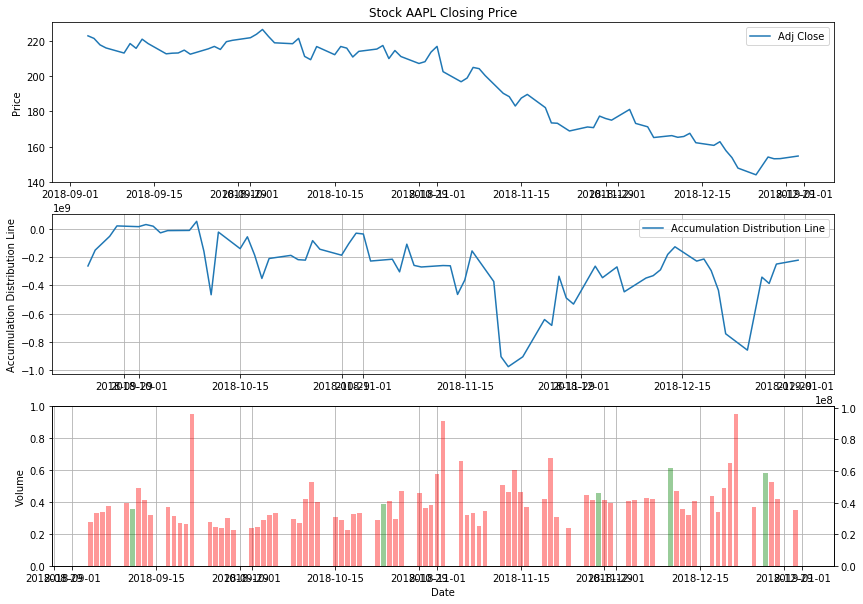

In [21]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')

## Candlestick with Accumulation/Distribution Line

In [22]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Adj Close,Close,High,Low,Open,Volume,ADL,VolumePositive
0,736941.0,223.062759,228.360001,229.179993,226.630005,228.410004,27390100,NaN,False
1,736942.0,221.607346,226.869995,229.669998,225.100006,228.990005,33333000,NaN,False
2,736943.0,217.924789,223.100006,227.350006,221.300003,226.229996,34290000,NaN,False
3,736944.0,216.166550,221.300003,225.369995,220.710007,221.850006,37619800,NaN,False
4,736947.0,213.265411,218.330002,221.850006,216.470001,220.949997,39516500,NaN,False


Text(0.5, 0, 'Date')

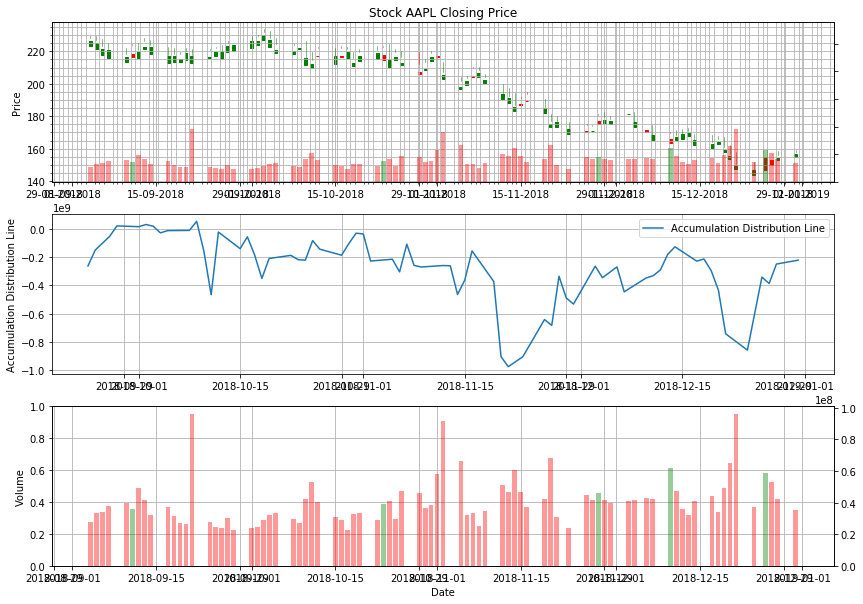

In [23]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')